
# Project: TMDB Movies Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I select the data set that contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. I will investigate the general properties that leads to high revenue for movies and relationship between different variables. The dependent variables in this analysis is revenue and popularity, budget, user ratings(variable name: vote_average) and runtime are the independent variables. Besides, I will explore which genres and director received highest profits, user ratings and popularity during all these years. The insights will help production companies and directors better understand the market and make wise decisions on investments. 

First of all, I will import the following packages that I need to use for my analysis.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, the original data set will be loaded and cleaned for further data analysis.

### General Properties

Load the csv file using pandas and check if the data set has been imported properly by reading the first 5 rows.

In [51]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The data set has 10866 rows and 21 columns in total.

In [3]:
df.shape

(10866, 21)

Below is the genreal property of all the variables. 
We can see that data type of all the numerical variables are either int or float. Categorical ones are object.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Here is the summary statistics of all the numerical variables in the dataset.

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The dataset only has one duplicate row, which will be deleted in data cleaning section.

In [6]:
df.duplicated().sum()

1

As the results below show, there are 8 columns with null values.

In [7]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### Data Cleaning 

> In this section, some columns and null values will be removed from the dataset because they are unnecessary to this analysis. Also, as for the column of genres, it contains multiple values seperated by pipe (|), which would make the grouping of genres difficult. Therefore, a new column of genres will be created and the old one will be deleted.

Drop the column of Release Date because we only need to know Release Year and there is already a column of it.
Drop the columns of Homepage, Tagline, Overview and Keywords since they don't affect the revenue and user ratings significantly. So these categorical variables do not contribute too much to the analysis. The dataset has two columns about IDs of movies. One is sufficient thus the column of ID will be dropped. Similarily, the columns showing the adjusted values of budget and revenue, budget_adj and revenue_adj, will be removed for the same reason.

In [52]:
df.drop(['id','cast','production_companies','homepage',
         'tagline','overview','keywords',
         'production_companies','release_date','budget_adj','revenue_adj'],axis=1,inplace=True)
df.head()

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,tt2908446,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,tt2820852,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015


Drop the null values. 
I don't replace the null values with mean or others because they are all categorical variables.

In [53]:
df.dropna(inplace=True)

Check if all null values are removed.

In [38]:
df.isnull().sum().any()

False

Drop the duplicate row.

In [54]:
df.drop_duplicates(inplace=True)

### Overview of Distribution of Numerical Variables

In order to have a better idea of how our quantitative variables spread, below are histograms for all the numerical variables. 
<ul>
    <li>As we can see, most of variables except release_year and vote_average are highly right skewed since nearly 50% of data in those columns equals to 0. This might due to the lack of data collection. Also 80% of popularity data is less than 1.0. Same situation applies to vote_count as well.</li>
    <li>The histogram of release_year shows ascending trend. This makes sense as release year represents each year since 1960. </li>
    <li>Only the data of vote_average has normal distribution with the mean value of 5.97.</li>
    </ul>

Outliers such as zero will reduce the accuracy of our analysis. So they need to be clean up before doing futher analysis.
To avoid the imbalanced data, the zero values in columns of revenue and budget will be replaced by mean values.

Text(0.5,1,'Historgrams of All Quantitative Variables')

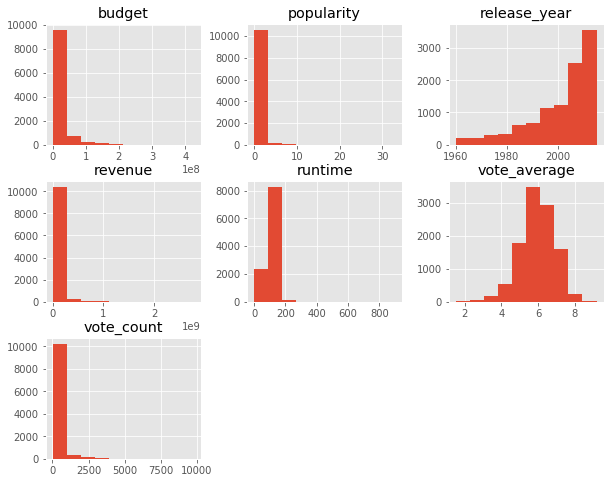

In [31]:
histogram_all = df.hist(figsize=(10,8))
plt.title('Historgrams of All Quantitative Variables')

In [55]:
df.query('revenue == 0')

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year
48,tt2231253,2.932340,30000000,0,Wild Card,Simon West,92,Thriller|Crime|Drama,481,5.3,2015
67,tt3247714,2.331636,20000000,0,Survivor,James McTeigue,96,Crime|Thriller|Action,280,5.4,2015
74,tt3478232,2.165433,0,0,Mythica: The Darkspore,Anne K. Black,108,Action|Adventure|Fantasy,27,5.1,2015
75,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,105,Comedy|Drama,569,7.7,2015
92,tt3608646,1.876037,0,0,Mythica: The Necromancer,A. Todd Smith,0,Fantasy|Action|Adventure,11,5.4,2015
93,tt3480796,1.872696,10000000,0,Vice,Brian A Miller,96,Thriller|Science Fiction|Action|Adventure,181,4.1,2015
100,tt4007502,1.724712,0,0,Frozen Fever,Chris Buck|Jennifer Lee,8,Adventure|Animation|Family,475,7.0,2015
101,tt0462335,1.661789,0,0,High-Rise,Ben Wheatley,119,Action|Drama|Science Fiction,161,5.4,2015
103,tt3321300,1.646664,0,0,Spooks: The Greater Good,Bharat Nalluri,104,Thriller|Action,114,5.6,2015
116,tt3086386,1.380320,0,0,The Scorpion King: The Lost Throne,Mike Elliott,105,Action|Fantasy|Adventure,22,4.5,2015


In [56]:
#Replace zero values with mean in revenue
mean_revenue = df.revenue.mean()
df = df.replace({'revenue': {0: mean_revenue}}) 
df

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,tt1392190,28.419936,150000000,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,tt2908446,13.112507,110000000,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,tt2488496,11.173104,200000000,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,tt2820852,9.335014,190000000,1.506249e+09,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015
5,tt1663202,9.110700,135000000,5.329505e+08,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,3929,7.2,2015
6,tt1340138,8.654359,155000000,4.406035e+08,Terminator Genisys,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,2598,5.8,2015
7,tt3659388,7.667400,108000000,5.953803e+08,The Martian,Ridley Scott,141,Drama|Adventure|Science Fiction,4572,7.6,2015
8,tt2293640,7.404165,74000000,1.156731e+09,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,2893,6.5,2015
9,tt2096673,6.326804,175000000,8.537086e+08,Inside Out,Pete Docter,94,Comedy|Animation|Family,3935,8.0,2015


In [57]:
df.query('budget == 0')

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year
30,tt3168230,3.927333,0,2.935520e+07,Mr. Holmes,Bill Condon,103,Mystery|Drama,425,6.4,2015
36,tt1291570,3.358321,0,2.235457e+07,Solace,Afonso Poyart,101,Crime|Drama|Mystery,474,6.2,2015
72,tt2911668,2.272044,0,4.589500e+04,Beyond the Reach,Jean-Baptiste LÃ©onetti,95,Thriller,81,5.5,2015
74,tt3478232,2.165433,0,4.008413e+07,Mythica: The Darkspore,Anne K. Black,108,Action|Adventure|Fantasy,27,5.1,2015
75,tt2582496,2.141506,0,4.008413e+07,Me and Earl and the Dying Girl,Alfonso Gomez-Rejon,105,Comedy|Drama,569,7.7,2015
88,tt3289728,1.959765,0,2.000000e+06,Equals,Drake Doremus,101,Drama|Romance|Science Fiction,135,5.6,2015
92,tt3608646,1.876037,0,4.008413e+07,Mythica: The Necromancer,A. Todd Smith,0,Fantasy|Action|Adventure,11,5.4,2015
95,tt2974918,1.841779,0,2.337556e+08,Alvin and the Chipmunks: The Road Chip,Walt Becker,92,Adventure|Animation|Comedy|Family,278,5.7,2015
100,tt4007502,1.724712,0,4.008413e+07,Frozen Fever,Chris Buck|Jennifer Lee,8,Adventure|Animation|Family,475,7.0,2015
101,tt0462335,1.661789,0,4.008413e+07,High-Rise,Ben Wheatley,119,Action|Drama|Science Fiction,161,5.4,2015


In [58]:
#Replace zero values with mean in budget
mean_budget = df.budget.mean()
df = df.replace({'budget': {0: mean_budget}}) 
df

,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,vote_count,vote_average,release_year
0,tt0369610,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,tt1392190,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,tt2908446,13.112507,1.100000e+08,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,tt2488496,11.173104,2.000000e+08,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,tt2820852,9.335014,1.900000e+08,1.506249e+09,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015
5,tt1663202,9.110700,1.350000e+08,5.329505e+08,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,3929,7.2,2015
6,tt1340138,8.654359,1.550000e+08,4.406035e+08,Terminator Genisys,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,2598,5.8,2015
7,tt3659388,7.667400,1.080000e+08,5.953803e+08,The Martian,Ridley Scott,141,Drama|Adventure|Science Fiction,4572,7.6,2015
8,tt2293640,7.404165,7.400000e+07,1.156731e+09,Minions,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,2893,6.5,2015
9,tt2096673,6.326804,1.750000e+08,8.537086e+08,Inside Out,Pete Docter,94,Comedy|Animation|Family,3935,8.0,2015


Split the column of genres because multiple values are in one line.

In [62]:
split = df['genres'].str.split('|',expand=True).stack()
split.index = split.index.droplevel(1)
split.name = 'genres_split'

Concatenate the series that I got from the split to the dataframe.

In [63]:
df = pd.concat((df,split),axis=1)

It is time to drop the original column of genres now.

In [64]:
df = df.drop('genres',axis=1)

After data cleaning, the dataset contains 26845 rows and 11 columns in total. The number of entry is double because we split the values of genres into multiple rows.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26845 entries, 0 to 10865
Data columns (total 11 columns):
imdb_id           26845 non-null object
popularity        26845 non-null float64
budget            26845 non-null int64
revenue           26845 non-null int64
original_title    26845 non-null object
director          26845 non-null object
runtime           26845 non-null int64
vote_count        26845 non-null int64
vote_average      26845 non-null float64
release_year      26845 non-null int64
genres_split      26845 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 2.5+ MB


# <a id='eda'></a>
## Exploratory Data Analysis

> In this part, the distrbution and relationship between independent and dependent variables will be visualized and examined. By doing this, I will explore further on the variables that are correlated and obtain the answers to those research questions that I am interested in.

## Research Question 1:
## What kinds of properties are associated with movies that have high revenues?

Here is the close-up of histograms for vote_average value. Vote average scores for most movies are ranged from 5 - 7.

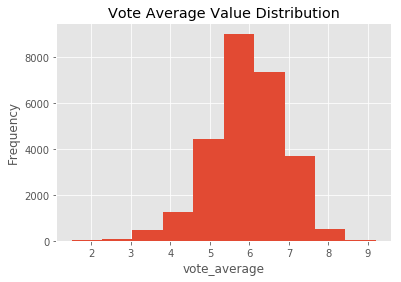

In [65]:
plt.style.use('ggplot')
plt.hist(df.vote_average)
plt.xlabel('vote_average')
plt.ylabel('Frequency')
plt.title('Vote Average Value Distribution')
plt.show()

### Overview of Correlation Between Independent and Dependent variables

In order to get a clear idea of correlation, scatter plots were built to explore the relationships between revenue and other numeric variables.

**Popularity V.S Revenue**
The scatter plot shows that they have a weak positive correlation as most of datapoints are clustered in bottom left corner. However, they are still correlated because there is a upward trend. As popularity increases, revenue tends to go up. This makes sense because as a movie gets more popular, more people might follow suit and go watch that movie because they want to get caught up. In this way, revenue increases as the popularity goes up.

Text(0.5,1,'Scatter Plot of Popularity V.S Revenue')

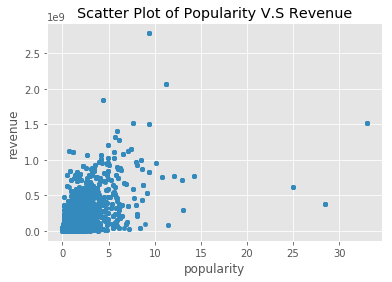

In [66]:
df.plot(x="popularity",y="revenue",kind="scatter")
plt.title('Scatter Plot of Popularity V.S Revenue')

**Vote Average V.S Revenue**
The scatter plot tells us that they are positively correlated. As mentioned before, there are lots of movies with zero revenue in this dataset so many data points are in a straight line in the plot. We can still see a slightly upward trend. This also makes sense since generally when user ratings of a movie gets higher, people tend to be more willing to go see that movie because it is considered a good movie by majority. Thus the revenue will tend to increase as well.

Text(0.5,1,'Scatter Plot of Vote Average V.S Revenue')

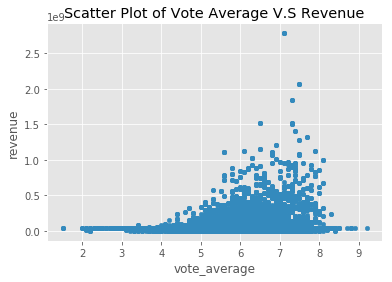

In [67]:
df.plot(x="vote_average",y="revenue",kind="scatter")
plt.title('Scatter Plot of Vote Average V.S Revenue')

**Runtime V.S Revenue**

The scatter plot shows that there is no correlation between runtime and revenue. Most movies are within the stardard range of runtime. The length of movie doesn't have significant impact on revenue. 

Text(0.5,1,'Scatter Plot of Runtime V.S Revenue')

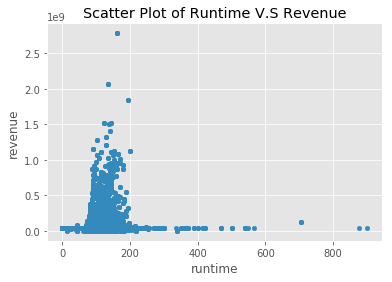

In [68]:
df.plot(x="runtime",y="revenue",kind="scatter")
plt.title('Scatter Plot of Runtime V.S Revenue')

**Budget V.S Revenue**
The scatter plot clearly shows that budget and revenue are positively correlated. As budget increases, revenue tends to move upward. If production companies invest more in their movies, the quality of movies could be improved and the possibility of movies getting popular becomes higher because audience love watching high-quality movies, which might lead to higher revenue.

Text(0.5,1,'Scatter Plot of Budget V.S Revenue')

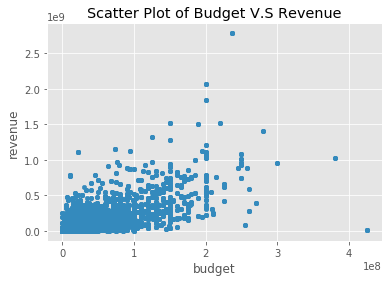

In [69]:
df.plot(x="budget",y="revenue",kind="scatter")
plt.title('Scatter Plot of Budget V.S Revenue')

## Research Question 2: 
## Which genres are the top 5 that generate the highest profit?

> This research question helps production companies better understand market's preferences on movies. Production companies care about profitability the most, so I use profit as the key metrics here.

A new column for profit was calculated by revenue and budget and added into the data frame.

In [70]:
df['profit'] = df.revenue - df.budget
df.head()

,imdb_id,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,genres_split,profit
0,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,Action,1.363529e+09
0,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,Adventure,1.363529e+09
0,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,Science Fiction,1.363529e+09
0,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,5562,6.5,2015,Thriller,1.363529e+09
1,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,6185,7.1,2015,Action,2.284364e+08


Here is a historgram of profit.

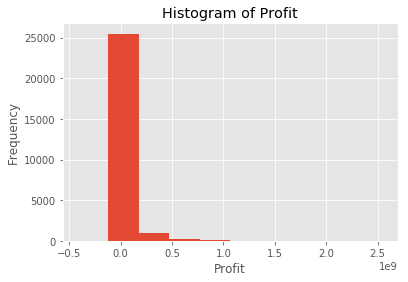

In [74]:
plt.style.use('ggplot')
plt.hist(df.profit)
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.title('Histogram of Profit')
plt.show()

Use Groupby function to organize the data to find the profit maximum 
and return the corresponding movie by year to year.

In [72]:
df_2 = df.loc[df.groupby('release_year')['profit'].idxmax()]
df_2

,imdb_id,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,genres_split,profit
10143,tt0054331,1.136943,12000000.0,6.000000e+07,Spartacus,Stanley Kubrick,197,211,6.9,1960,Action,4.800000e+07
10143,tt0054331,1.136943,12000000.0,6.000000e+07,Spartacus,Stanley Kubrick,197,211,6.9,1960,Drama,4.800000e+07
10143,tt0054331,1.136943,12000000.0,6.000000e+07,Spartacus,Stanley Kubrick,197,211,6.9,1960,History,4.800000e+07
10110,tt0055254,2.631987,4000000.0,2.158800e+08,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79,913,6.6,1961,Adventure,2.118800e+08
10110,tt0055254,2.631987,4000000.0,2.158800e+08,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79,913,6.6,1961,Animation,2.118800e+08
10110,tt0055254,2.631987,4000000.0,2.158800e+08,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79,913,6.6,1961,Comedy,2.118800e+08
10110,tt0055254,2.631987,4000000.0,2.158800e+08,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,79,913,6.6,1961,Family,2.118800e+08
9849,tt0055928,3.170651,1100000.0,5.960000e+07,Dr. No,Terence Young,110,560,6.7,1962,Adventure,5.850000e+07
9849,tt0055928,3.170651,1100000.0,5.960000e+07,Dr. No,Terence Young,110,560,6.7,1962,Action,5.850000e+07
9849,tt0055928,3.170651,1100000.0,5.960000e+07,Dr. No,Terence Young,110,560,6.7,1962,Thriller,5.850000e+07


Then the top 5 genres that generate highest profit during 1960-2015 these years are sorted out as the followings:
__Adventrue, Action, Drama, Science Fiction, Fantasy__

In [73]:
count = df_2.groupby('genres_split').count()
count.sort_values(by='profit',ascending=False).head(5)

,imdb_id,popularity,budget,revenue,original_title,director,runtime,vote_count,vote_average,release_year,profit
genres_split,,,,,,,,,,,
Adventure,36,36,36,36,36,36,36,36,36,36,36
Action,26,26,26,26,26,26,26,26,26,26,26
Drama,16,16,16,16,16,16,16,16,16,16,16
Science Fiction,16,16,16,16,16,16,16,16,16,16,16
Fantasy,15,15,15,15,15,15,15,15,15,15,15


## Research Question 3: 
## Which genres are the highest rated among these years (1960 - 2015)?  

> Other than profits, production companies also need to think about how to maintain and improve user ratings, which is good for its long-term performance and development. 

Value of 6.6 was selected as the threshold to filter the data because this is the value of 75% percentile for vote_average. In other words, if a movie got a vote score above the third quartile (Q3), it means that this movie can be considered high-quality because it is rated higher than 75% of others.

Use query function to filter the data first, then count how many unique genres fall into the range.

In [30]:
genres_counts = df.query('vote_average >= 6.6')['genres_split'].value_counts()
genres_counts

Drama              1571
Comedy              825
Thriller            512
Action              472
Romance             433
Crime               394
Adventure           380
Documentary         357
Family              320
Animation           299
Science Fiction     238
Fantasy             203
Music               187
Mystery             187
Horror              149
History             148
War                 111
Foreign              56
Western              51
TV Movie             30
Name: genres_split, dtype: int64

Use nlargest function to return the top 5 genres that have the most movies voted equal or higher than Q3.
The top 5 genres are the followings: __Drama, Comedy, Thriller, Action, Romance__

In [31]:
top5_list = genres_counts.nlargest(5)
print(top5_list)

Drama       1571
Comedy       825
Thriller     512
Action       472
Romance      433
Name: genres_split, dtype: int64


## Research Question 4: 
## Which director did produce the most popular movie from year to year?

> By knowing which director received highest popularity each year, production companies can invest more in those directors' work and have more confidence in their investment. 

Below is the list of the directors who produced the most popular movie, grouping by each year.

In [32]:
df_4 = df.loc[df.groupby('release_year')['popularity'].idxmax()]
df_4[['director','release_year','popularity']].drop_duplicates()

,director,release_year,popularity
10141,Alfred Hitchcock,1960,2.610362
10110,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,1961,2.631987
9849,Terence Young,1962,3.170651
10438,Terence Young,1963,2.508235
9881,Guy Hamilton,1964,3.153791
10689,Terence Young,1965,1.910465
10820,Chuck Jones|Ben Washam,1966,1.227582
10398,Wolfgang Reitherman,1967,2.550704
9719,Stanley Kubrick,1968,3.309196
10724,Peter R. Hunt,1969,1.778746


Here are the sorted list of directors who produced the highest number of most popular movies.

In [33]:
final_4 = df_4[['director','release_year','popularity']].drop_duplicates()
final_4.groupby('director').count().sort_values(by='popularity',ascending=False)

,release_year,popularity
director,,
Wolfgang Reitherman,3,3
James Cameron,3,3
Peter Jackson,3,3
Ridley Scott,3,3
Christopher Nolan,3,3
Terence Young,3,3
David Fincher,2,2
Francis Ford Coppola,2,2
John McTiernan,2,2


<a id='conclusions'></a>
## Conclusions

> In order to increase revenue for movies, production companies and directors could focus on improving the quality of movies, because vote_average has a positive correlation with revenue. If the movie quality is high enough, user ratings will be more likely to get better and more people might go watch the movie because of the high ratings. In generally, lots of people will do online research on IMDB or other movie review website before they decide to watch the movie. 

> If possible, increasing the budget might be helpful to boost revenue as budget and revenue are positively correlated. If production companies and directors want to improve the movie quality, higher budget means that they are able to work with more talented actors, set up better scenes and props, and create well-written scripts, which are all the necessary elements that contribute to a good movie that attracts audience. 

> People have been more interested in watching movies of adventure, action, drama, science fiction and fantasy from 1960 to 2015. If prodcution companies invest in these types of genres, it should be more likely to gain higher profits. 

## Limitations

> Almost 50% of revenue and budget data in this dataset are zeros, which prevents us to understand the real distribution of data. We are unable to know how profitable and popular these movies used to be because of lack of real historical data. Even though the zero values have been replaced with mean value, they still could not reflect the fact very well since mean sometimes is too generalized. Such limitation might lead to inaccurate data analysis and conclusions.

> Also, the sample size of the dataset still seems to be small even though there is about 10,000 records in the original file, because the estimate of movies produced each year is about 60,000 to 70,000. Therefore, such a sample size might be insufficient for us to draw genreal and reasonable conclusions upon the data.

> Only scatter plots and basic statistical summary are available for conclusions for now. No causation can be implied. The factors mentioned above and results might also get affected by other constraints in real life.


In [75]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset-Project_2.ipynb'])

0